In [1]:
include("sepsis_types.jl")
using .SepsisTypes
include("sepsis.jl")
using .Sepsis
include("inference.jl")
using .Inference
using Revise
using PyCall;
using Gen;
using CairoMakie
sepsis_gym = pyimport("custom_sepsis");

In [2]:
nr_episodes_history = 1

1

In [3]:
random_policies = [sepsis_gym.random_policy() for _ in 1:nr_episodes_history]
train_ep = [sepsis_gym.run_episode(policy) for policy in random_policies]
start_states = [to_state(ep.visited[1]) for ep in train_ep]

episodes = choicemap()
for (i, episode) in enumerate(train_ep)
    episodes = update_choicemap(episodes, i, episode)
end;

policies = [to_policy(pol) for pol in random_policies];


In [4]:
trace, sc = generate(sepsis_model, (policies, start_states), episodes);
traces = [trace]
sc

-Inf

In [5]:
nr_traces = 1000

while length(traces) < nr_traces
    (trace, acc) = mh(trace, select(:beliefs, :episode => i => :action for i in 1:nr_episodes_history))
    push!(traces, trace)
end

In [6]:
length(traces)


1000

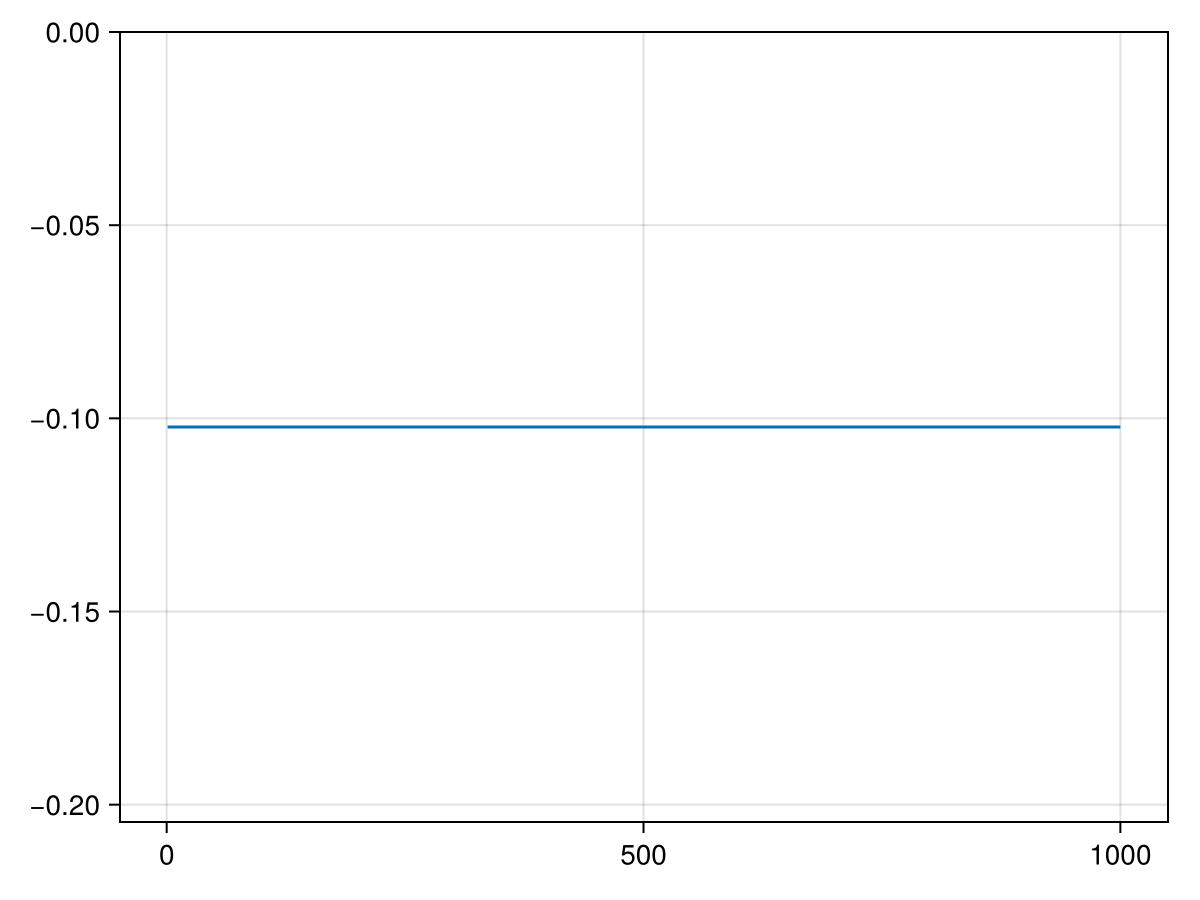

In [7]:
sums = [sum(sepsis_gym.TRUE_ENV_PARAMS .- get_env_params(trace[:beliefs])) for trace in traces]
lines(sums)